# Smoking is bad

In [ ]:
%pip install polars
%pip install pyarrow


In [55]:
# TODO: install all the necessary packages

import numpy as np
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [38]:
# TODO: load the data using the pathlib library to create the path to your data

smoking_data_path = Path("data/smoking_data.csv")

df = pd.read_csv(smoking_data_path)

df.head()

,Unnamed: 0,outcome,smoker,age,gender,salary
0,0,Alive,Yes,23,female,7286.0
1,1,Alive,Yes,18,male,NaN
2,2,Dead,Yes,71,male,NaN
3,3,Alive,No,67,male,NaN
4,4,Alive,No,64,female,20123.0


In [39]:
# TODO: what are the dimensions of the data frame?
df.info()
df.shape

# this tells us the dataset has 1314 obs for 6 variables


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1314 non-null   int64  
 1   outcome     1314 non-null   object 
 2   smoker      1314 non-null   object 
 3   age         1314 non-null   int64  
 4   gender      1314 non-null   object 
 5   salary      614 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 61.7+ KB


(1314, 6)

In [40]:
# TODO: use .describe() on your data frame: what do you notice about the string columns?

df.describe()

# observation: there are no string (object) columns being summarised, because .describe() by default only includes numeric data.


,Unnamed: 0,age,salary
count,1314.000000,1314.000000,614.000000
mean,656.500000,46.920091,48737.265472
std,379.463437,17.432027,28575.395264
min,0.000000,18.000000,1215.000000
25%,328.250000,32.000000,24112.250000
50%,656.500000,46.000000,48692.000000
75%,984.750000,61.000000,72946.250000
max,1313.000000,84.000000,99677.000000


In [41]:
# checking the string columns:

df.dtypes


Unnamed: 0      int64
outcome        object
smoker         object
age             int64
gender         object
salary        float64
dtype: object

In [42]:
# to include string variables in our described() fn:

df.describe(include='all')

,Unnamed: 0,outcome,smoker,age,gender,salary
count,1314.000000,1314,1314,1314.000000,1314,614.000000
unique,NaN,2,2,NaN,2,NaN
top,NaN,Alive,No,NaN,male,NaN
freq,NaN,945,732,NaN,693,NaN
mean,656.500000,NaN,NaN,46.920091,NaN,48737.265472
std,379.463437,NaN,NaN,17.432027,NaN,28575.395264
min,0.000000,NaN,NaN,18.000000,NaN,1215.000000
25%,328.250000,NaN,NaN,32.000000,NaN,24112.250000
50%,656.500000,NaN,NaN,46.000000,NaN,48692.000000
75%,984.750000,NaN,NaN,61.000000,NaN,72946.250000


In [43]:
# TODO: do not forget to check the null values

df.isnull().sum()

Unnamed: 0      0
outcome         0
smoker          0
age             0
gender          0
salary        700
dtype: int64

In [48]:
# TODO: prepare your data frame so that you can work with

# 700 out of 1316 values for salary are missing, so perhaps we just drop the salary variable altogether

df_cleaned = df.copy()

df_cleaned = df_cleaned.drop("salary", axis=1)

df_cleaned.head()

df_cleaned.shape



(1314, 5)

## Smoking analysis
Let's first check what your cousin did.

In [51]:
# TODO: Reimplement the small code snippet described in the problem set instructions.
df["alive"] = np.where(df["outcome"] == "Alive", 1, 0)

df.groupby(["smoker"]).agg(prob=("alive", np.mean))

/var/folders/ty/dkcr_gf554x3w6pdxx0ljh240000gn/T/ipykernel_23859/1914947022.py:4: FutureWarning: The provided callable <function mean at 0x1122daf80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(["smoker"]).agg(prob=("alive", np.mean))


,prob
smoker,
No,0.685792
Yes,0.761168


You should get the same results.

# Is smoking really good?
Now it is up to you to run the analysis further and check what could be underlying your cousings results.

In [52]:
df_cleaned.head(100)

,Unnamed: 0,outcome,smoker,age,gender
0,0,Alive,Yes,23,female
1,1,Alive,Yes,18,male
2,2,Dead,Yes,71,male
3,3,Alive,No,67,male
4,4,Alive,No,64,female
...,...,...,...,...,...
95,95,Alive,No,26,male
96,96,Dead,No,68,female
97,97,Alive,Yes,49,male
98,98,Dead,No,72,female


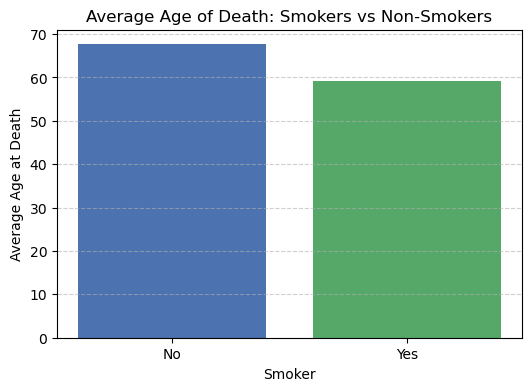

In [57]:
# Comparison of average age of death, for smokers vs non-smokers:

df_dead = df[df["outcome"] == "Dead"]
df_dead.groupby("smoker").agg(avg_age_of_death=("age", "mean"))

avg_age = df_dead.groupby("smoker")["age"].mean().reset_index()
plt.figure(figsize=(6,4))
plt.bar(avg_age["smoker"], avg_age["age"], color=["#4C72B0", "#55A868"])
plt.title("Average Age of Death: Smokers vs Non-Smokers")
plt.xlabel("Smoker")
plt.ylabel("Average Age at Death")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


In [58]:
# this shows that on average, smokers die younger. the initial results therefore are confounded by the presence of people alive in the dataset.

In [ ]:
df["smoker"].value_counts()



smoker
No     732
Yes    582
Name: count, dtype: int64

In [ ]:
df.groupby("smoker")["age"].mean()

# so the average age of the smoker group asked is younger than the non-smoker group

smoker
No     48.699454
Yes    44.682131
Name: age, dtype: float64